In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message="^internal gelsd"
)

In [2]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [3]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ', regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:  0.8972106381789521


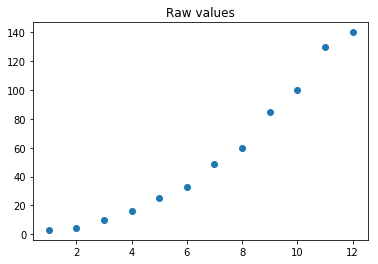

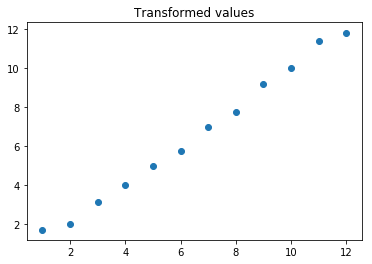

In [5]:
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

sqrt_feature = [math.sqrt(x) for x in feature]

plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

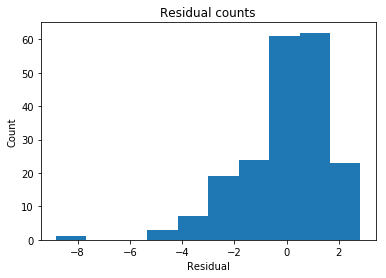

In [6]:
predicted = regr.predict(X).ravel()
actual = data['Sales']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

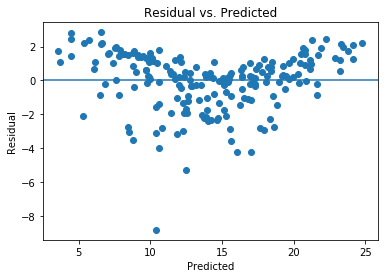

In [7]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Work out why there are non-normal residuals and heteroscedasicity

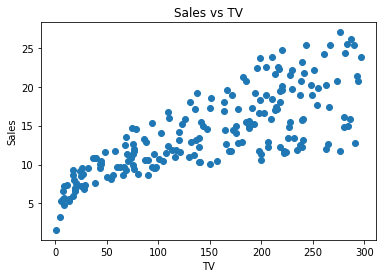

In [8]:
plt.scatter('TV', 'Sales', data=data)
plt.title('Sales vs TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

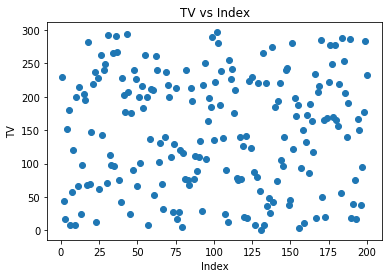

In [9]:
plt.scatter('Unnamed: 0', 'TV', data=data)
plt.title('TV vs Index')
plt.xlabel('Index')
plt.ylabel('TV')
plt.show()

No seasonality

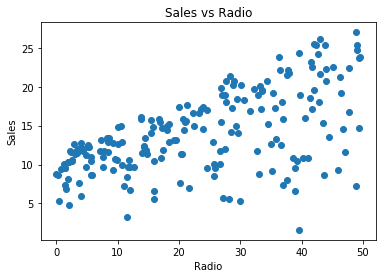

In [10]:
plt.scatter('Radio', 'Sales', data=data)
plt.title('Sales vs Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

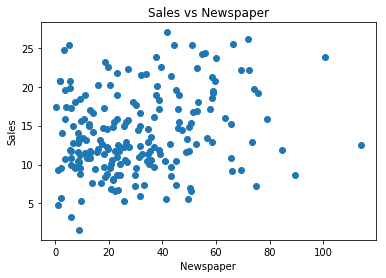

In [11]:
plt.scatter('Newspaper', 'Sales', data=data)
plt.title('Sales vs Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

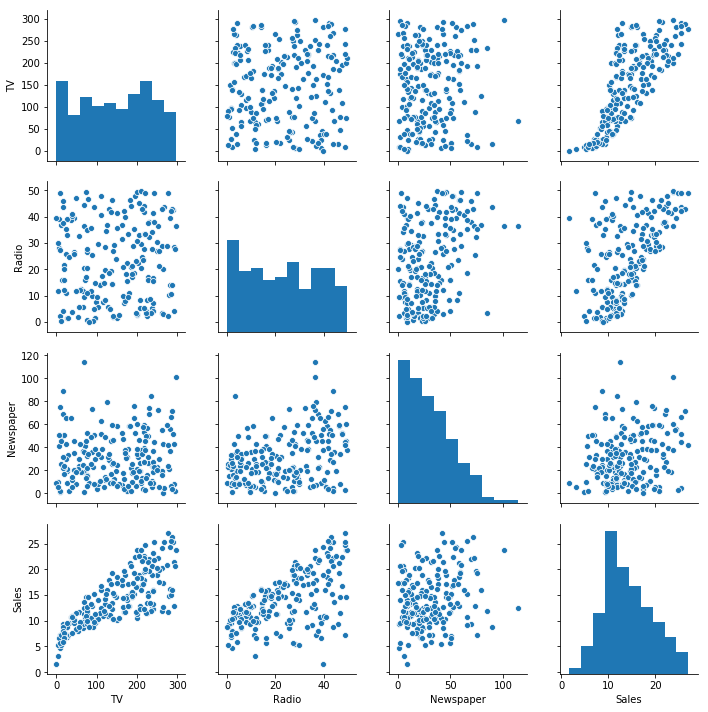

In [12]:
sns.pairplot(data.loc[:, ['TV', 'Radio', 'Newspaper', 'Sales']],
            diag_kind='hist')
plt.show()

In [13]:
## Try sqrt transformation

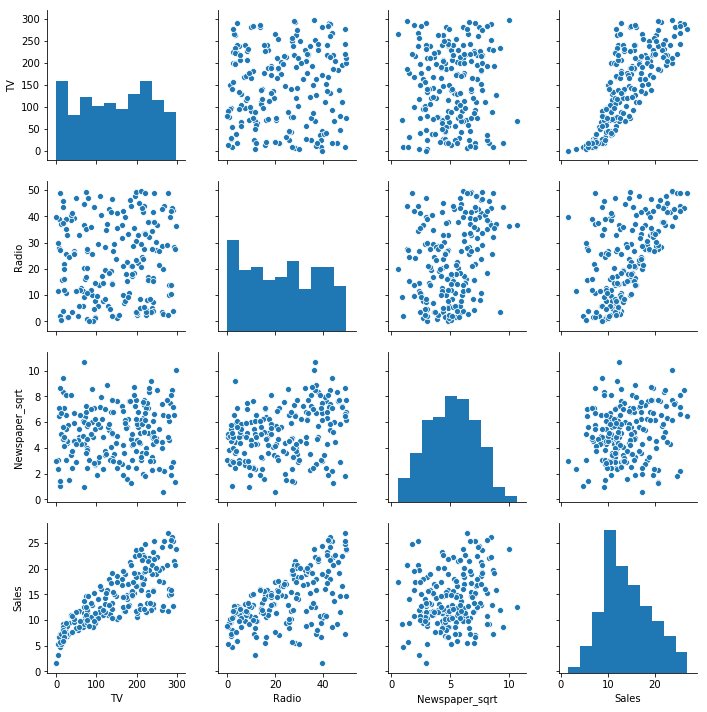

In [14]:
data['Newspaper_sqrt'] = data['Newspaper'].apply(lambda x: math.sqrt(x))

sns.pairplot(data.loc[:, ['TV', 'Radio', 'Newspaper_sqrt', 'Sales']],
             diag_kind='hist')
plt.show()

In [15]:
regr_2 = linear_model.LinearRegression()
Y_2 = data['Sales'].values.reshape(-1, 1)
X_2 = data[['TV', 'Radio', 'Newspaper_sqrt']]
regr_2.fit(X_2, Y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print('\nCoefficients: \n', regr_2.coef_)
print('\nIntercept: \n', regr_2.intercept_)
print('\nR-squared: ', regr_2.score(X_2, Y_2))


Coefficients: 
 [[0.04575006 0.18769763 0.00692624]]

Intercept: 
 [2.89309855]

R-squared:  0.8972008603619454


In [17]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ', regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:  0.8972106381789521


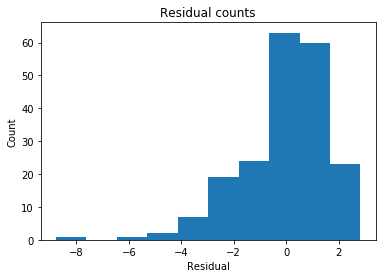

In [18]:
predicted_2 = regr_2.predict(X_2).ravel()
actual = data['Sales']

residual_2 = actual - predicted_2

plt.hist(residual_2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [19]:
## Try squaring other two variables

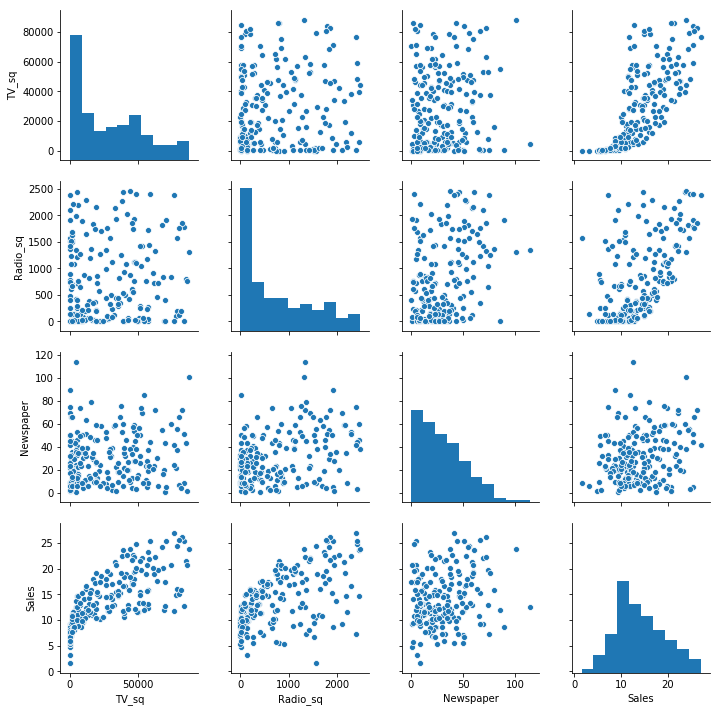

In [20]:
data['TV_sq'] = data['TV'].apply(lambda x: x**2)
data['Radio_sq'] = data['Radio'].apply(lambda x: x**2)

sns.pairplot(data.loc[:, ['TV_sq', 'Radio_sq', 'Newspaper', 'Sales']],
             diag_kind='hist')
plt.show()

In [21]:
regr_3 = linear_model.LinearRegression()
Y_3 = data['Sales'].values.reshape(-1, 1)
X_3 = data[['TV_sq', 'Radio_sq', 'Newspaper']]
regr_3.fit(X_3, Y_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print('\nCoefficients: \n', regr_3.coef_)
print('\nIntercept: \n', regr_3.intercept_)
print('\nR-squared: ', regr_3.score(X_3, Y_3))


Coefficients: 
 [[ 0.00014246  0.00363948 -0.00252947]]

Intercept: 
 [7.20687963]

R-squared:  0.7993095686777913


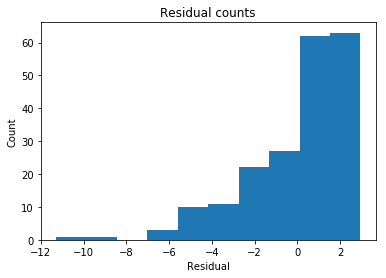

In [23]:
predicted_3 = regr_3.predict(X_3).ravel()
actual = data['Sales']

residual_3 = actual - predicted_3

plt.hist(residual_3)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [24]:
## Try log transformation

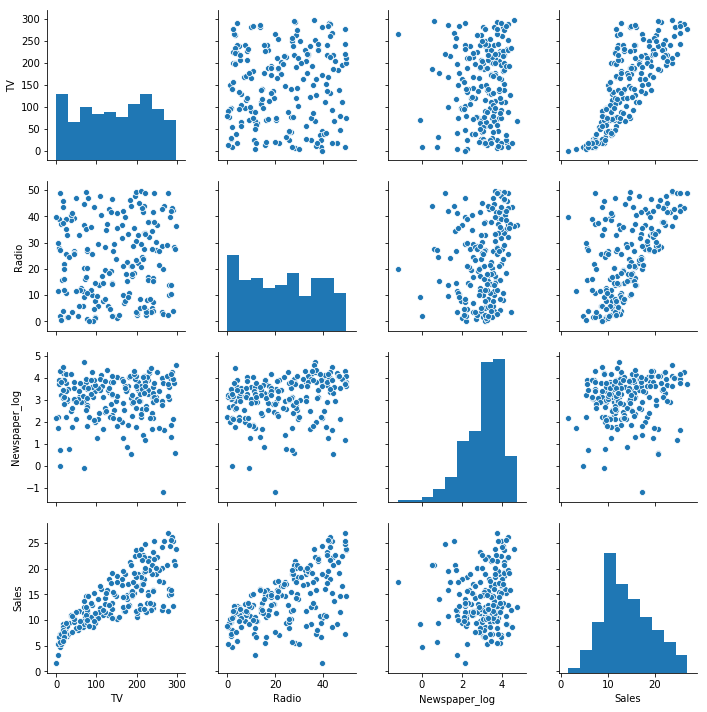

In [25]:
data['Newspaper_log'] = np.log(data['Newspaper'])

sns.pairplot(data.loc[:, ['TV', 'Radio', 'Newspaper_log', 'Sales']],
             diag_kind='hist')
plt.show()

In [26]:
regr_4 = linear_model.LinearRegression()
Y_4 = data['Sales'].values.reshape(-1, 1)
X_4 = data[['TV', 'Radio', 'Newspaper_log']]
regr_4.fit(X_4, Y_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print('\nCoefficients: \n', regr_4.coef_)
print('\nIntercept: \n', regr_4.intercept_)
print('\nR-squared: ', regr_4.score(X_4, Y_4))


Coefficients: 
 [[0.04574986 0.18739042 0.03895865]]

Intercept: 
 [2.81604346]

R-squared:  0.8972440487671222


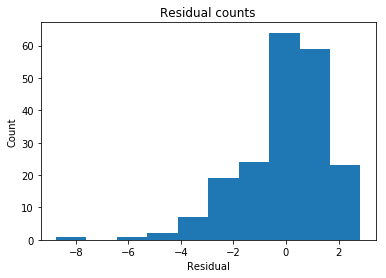

In [28]:
predicted_4 = regr_4.predict(X_4).ravel()
actual = data['Sales']

residual_4 = actual - predicted_4

plt.hist(residual_4)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [29]:
## Try Boxcox transformation

In [30]:
data['Newspaper_bc'] = scipy.stats.boxcox(np.array(data['Newspaper']), lmbda=None)[0]

In [31]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Newspaper_sqrt,TV_sq,Radio_sq,Newspaper_log,Newspaper_bc
0,1,230.100,37.800,69.200,22.100,8.319,52946.010,1428.840,4.237,11.720
1,2,44.500,39.300,45.100,10.400,6.716,1980.250,1544.490,3.809,9.401
2,3,17.200,45.900,69.300,9.300,8.325,295.840,2106.810,4.238,11.728
3,4,151.500,41.300,58.500,18.500,7.649,22952.250,1705.690,4.069,10.760
4,5,180.800,10.800,58.400,12.900,7.642,32688.640,116.640,4.067,10.751


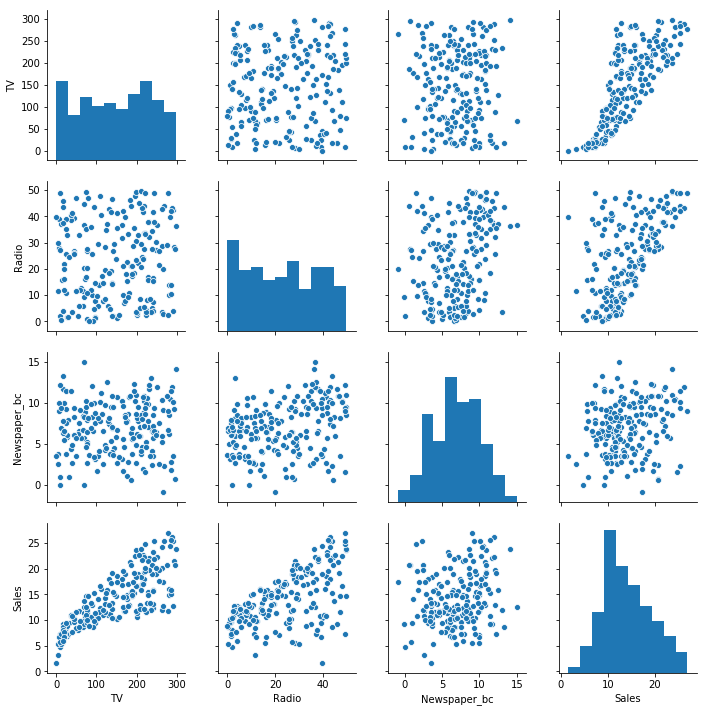

In [32]:
sns.pairplot(data.loc[:, ['TV', 'Radio', 'Newspaper_bc', 'Sales']],
             diag_kind='hist')
plt.show()

In [33]:
regr_5 = linear_model.LinearRegression()
Y_5 = data['Sales'].values.reshape(-1, 1)
X_5 = data[['TV', 'Radio', 'Newspaper_bc']]
regr_5.fit(X_5, Y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
print('\nCoefficients: \n', regr_5.coef_)
print('\nIntercept: \n', regr_5.intercept_)
print('\nR-squared: ', regr_5.score(X_5, Y_5))


Coefficients: 
 [[0.04574887 0.18760589 0.00601171]]

Intercept: 
 [2.88938655]

R-squared:  0.8972063971940339


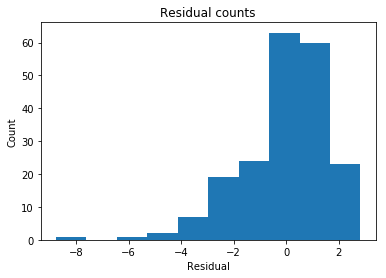

In [35]:
predicted_5 = regr_5.predict(X_5).ravel()
actual = data['Sales']

residual_5 = actual - predicted_5

plt.hist(residual_5)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

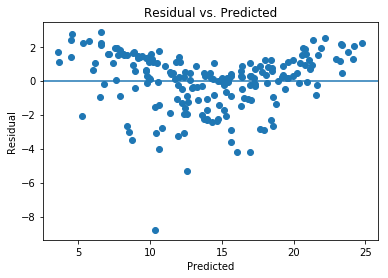

In [36]:
plt.scatter(predicted_5, residual_5)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [37]:
## Try interaction term transformation

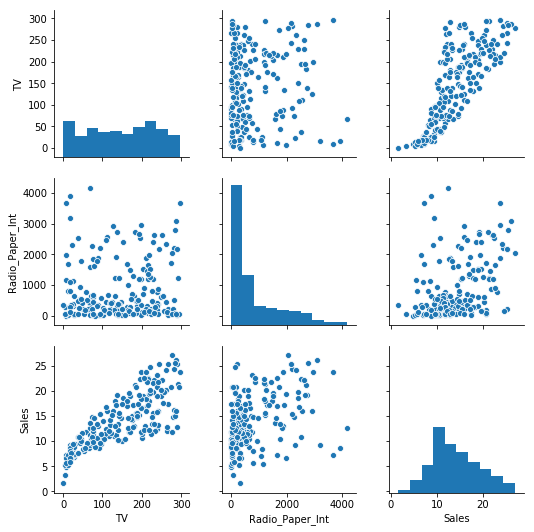

In [38]:
data["Radio_Paper_Int"] = data['Radio'] * data['Newspaper']

sns.pairplot(data.loc[:, ['TV', 'Radio_Paper_Int', 'Sales']],
             diag_kind='hist')
plt.show()

In [39]:
regr_6 = linear_model.LinearRegression()
Y_6 = data['Sales'].values.reshape(-1, 1)
X_6 = data[['TV', 'Radio_Paper_Int']]
regr_6.fit(X_6, Y_6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
print('\nCoefficients: \n', regr_6.coef_)
print('\nIntercept: \n', regr_6.intercept_)
print('\nR-squared: ', regr_6.score(X_6, Y_6))


Coefficients: 
 [[0.04646769 0.00211715]]

Intercept: 
 [5.44369393]

R-squared:  0.7563837847700486


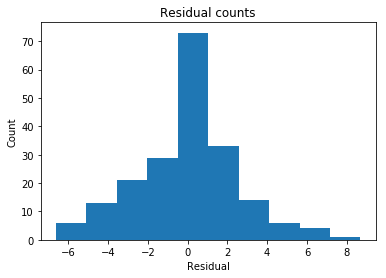

In [41]:
predicted_6 = regr_6.predict(X_6).ravel()
actual = data['Sales']

residual_6 = actual - predicted_6

plt.hist(residual_6)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

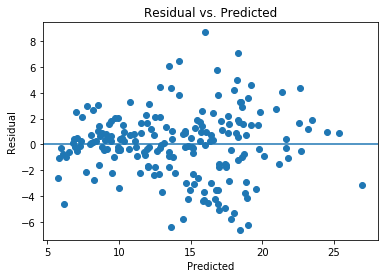

In [42]:
plt.scatter(predicted_6, residual_6)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [43]:
## The residuals and scedasticity are now as hoped.